## This notebook illustrates every step of the process of training models for ic labeling.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

First of all, we need the dataset. We can download and it using the following commands.

Now, we load the dataset. For this we use the special function, which reads the csv-files from the directory and puts the data in a convenient format.

In [2]:
from alice_ml.preprocessing import load_dataset

path = 'dataset_mu_asd_10.0'

data, raw_annotations = load_dataset(path, preload=False)

In [3]:
len(data.keys())

217

In [4]:
raw_annotations.shape

(22, 19)

In [5]:
data.keys()

dict_keys(['IC002497', 'IC002513', 'IC002528', 'IC002544', 'IC002560', 'IC002576', 'IC002592', 'IC002608', 'IC002624', 'IC002640', 'IC002652', 'IC002668', 'IC002684', 'IC002700', 'IC002498', 'IC002514', 'IC002529', 'IC002545', 'IC002561', 'IC002577', 'IC002593', 'IC002609', 'IC002625', 'IC002641', 'IC002653', 'IC002669', 'IC002685', 'IC002701', 'IC002499', 'IC002515', 'IC002530', 'IC002546', 'IC002562', 'IC002578', 'IC002594', 'IC002610', 'IC002626', 'IC002654', 'IC002670', 'IC002686', 'IC002702', 'IC002500', 'IC002516', 'IC002531', 'IC002547', 'IC002563', 'IC002579', 'IC002595', 'IC002611', 'IC002627', 'IC002655', 'IC002671', 'IC002687', 'IC002703', 'IC002501', 'IC002517', 'IC002532', 'IC002548', 'IC002564', 'IC002580', 'IC002596', 'IC002612', 'IC002628', 'IC002656', 'IC002672', 'IC002688', 'IC002502', 'IC002533', 'IC002549', 'IC002565', 'IC002581', 'IC002597', 'IC002613', 'IC002629', 'IC002657', 'IC002673', 'IC002689', 'IC002487', 'IC002503', 'IC002518', 'IC002534', 'IC002550', 'IC00

In [6]:
raw_annotations['ic_id']

0     IC002513
1     IC002561
2     IC002515
3     IC002655
4     IC002532
5     IC002533
6     IC002597
7     IC002598
8     IC002599
9     IC002537
10    IC002491
11    IC002522
12    IC002618
13    IC002694
14    IC002679
15    IC002588
16    IC002620
17    IC002648
18    IC002664
19    IC002589
20    IC002623
21    IC002651
Name: ic_id, dtype: object

In [7]:
# Convert the dictionary keys and the 'ic_id' column to sets
data_keys = set(data.keys())
ic_ids = set(raw_annotations['ic_id'])

# Find the intersection (common elements)
common_ids = data_keys.intersection(ic_ids)

# Output the result
print(f"Common IDs between data keys and raw_annotations: {common_ids}")


Common IDs between data keys and raw_annotations: {'IC002694', 'IC002491', 'IC002533', 'IC002561', 'IC002599', 'IC002623', 'IC002515', 'IC002651', 'IC002589', 'IC002513', 'IC002597', 'IC002664', 'IC002532', 'IC002522', 'IC002679', 'IC002598', 'IC002648', 'IC002618', 'IC002655', 'IC002537', 'IC002588', 'IC002620'}


In [8]:
common_count = len(common_ids)

# Output the result
print(f"Number of matching IDs between data keys and raw_annotations: {common_count}")

Number of matching IDs between data keys and raw_annotations: 22


In [9]:
# Convert the dictionary keys and the 'ic_id' column to sets
data_keys = set(data.keys())
ic_ids = set(raw_annotations['ic_id'])

# Найти пересечение общих элементов
common_ids = data_keys.intersection(ic_ids)

# Оставить только строки в raw_annotations, которые имеют общие ic_id
raw_annotations = raw_annotations[raw_annotations['ic_id'].isin(common_ids)]

# Оставить только совпавшие ключи в data
data = {key: data[key] for key in common_ids}

# Вывод отфильтрованных данных
print(f"Filtered raw_annotations:\n{raw_annotations}")
print(f"Filtered data:\n{data}")


Filtered raw_annotations:
       ic_id                                          user_hash  comment  \
0   IC002513  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
1   IC002561  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
2   IC002515  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
3   IC002655  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
4   IC002532  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
5   IC002533  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
6   IC002597  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
7   IC002598  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
8   IC002599  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
9   IC002537  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
10  IC002491  33326b51632c520162e38b3e2836402ba097aa1249edf2...      NaN   
11  IC002522  33326b51632c520162e38b3e2836402ba097aa1249edf2..

In [10]:
! mne --version

MNE 0.23.4


Now, we calculate features for each ic in the dataset.

In [11]:
from alice_ml.features import build_feature_df

features = build_feature_df(data)
features

/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/mne/io/meas_info.py:2066: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sfreq = float(sfreq)
/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/mne/io/meas_info.py:2066: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sfreq = float(sfreq)
/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/mne/io/meas_info.py:2066: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sfreq = float(sfreq)
/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/mne/io/meas_info.py:2066: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use fl

,K,MEV,SAD,SVD,SED,MIF,CORR_BL,CORR_MOVE,AT,MT,...,average_persistence_with_phase,spatial_persistence,A_peaks,A_plateaus,A_peaks_freq,A_plateaus_freq,pca1,pca2,avg_persistence,max_persistence
IC002694,0.257372,32.436346,-0.048150,-0.064294,0.018228,0.135351,0.008420,0.010754,-0.009169,0.073744,...,0.638353,0.087481,0.431937,0.623037,9.168491,9.046090,0.014609,0.271185,0.047721,0.501112
IC002491,0.047633,144.903796,-0.106425,-0.026207,0.064827,0.165797,0.007034,0.008347,0.033114,0.151433,...,1.013842,0.149520,0.605664,0.775599,8.920110,8.850547,-0.026684,0.157589,0.028558,0.160894
IC002533,-0.256521,3.253832,-0.066450,-0.008905,0.146514,0.050304,0.003482,0.005025,0.076768,0.091645,...,1.022752,0.192914,0.688705,0.876033,9.401435,9.101277,0.509443,-0.292102,0.042710,0.509379
IC002561,0.658043,95.137074,-0.060966,-0.027087,0.023889,0.147233,0.015362,0.017387,0.055397,0.094813,...,0.741548,0.264641,0.580328,0.662295,9.106268,8.867847,-0.456185,-0.448217,0.041753,0.580042
IC002599,-0.305818,5.755902,-0.134419,-0.051479,0.040413,0.130575,0.001931,0.002232,-0.023055,0.096387,...,1.075822,0.030981,0.279749,0.356994,8.599659,8.324018,-0.105512,0.423922,0.045979,0.427039
IC002623,-0.293511,4.317078,-0.038938,-0.000204,0.182107,0.132900,0.003490,0.004287,0.006248,0.050173,...,1.097094,0.238072,0.711165,0.859223,8.750923,8.805466,0.397291,-0.253462,0.034988,0.282468
IC002515,-0.041907,5.678806,-0.155282,-0.019575,0.051769,0.295296,0.003826,0.005325,-0.013641,0.130177,...,0.726185,0.121404,0.213508,0.291939,8.977009,8.755083,-0.305704,-0.032109,0.023648,0.093007
IC002651,0.681738,95.981862,0.029930,-0.015203,0.229844,0.318649,0.005895,0.009435,0.014759,0.011908,...,0.967339,0.140538,0.249322,0.295393,11.255654,11.178388,0.573682,-0.181666,0.033211,0.124259
IC002589,-0.329044,4.107926,-0.059627,-0.032159,0.076678,0.082703,0.001313,0.001312,-0.056356,0.134715,...,1.003756,0.175200,0.883090,0.924843,9.798763,9.764107,-0.397932,-0.016941,0.035317,0.228181
IC002513,0.790829,6.152846,-0.174016,-0.018633,0.049056,0.366982,0.004826,0.005719,-0.056237,0.126065,...,0.714180,0.076229,0.305011,0.331155,9.438152,9.355552,0.329988,0.043241,0.025301,0.104585


In [12]:
features

,K,MEV,SAD,SVD,SED,MIF,CORR_BL,CORR_MOVE,AT,MT,...,average_persistence_with_phase,spatial_persistence,A_peaks,A_plateaus,A_peaks_freq,A_plateaus_freq,pca1,pca2,avg_persistence,max_persistence
IC002694,0.257372,32.436346,-0.048150,-0.064294,0.018228,0.135351,0.008420,0.010754,-0.009169,0.073744,...,0.638353,0.087481,0.431937,0.623037,9.168491,9.046090,0.014609,0.271185,0.047721,0.501112
IC002491,0.047633,144.903796,-0.106425,-0.026207,0.064827,0.165797,0.007034,0.008347,0.033114,0.151433,...,1.013842,0.149520,0.605664,0.775599,8.920110,8.850547,-0.026684,0.157589,0.028558,0.160894
IC002533,-0.256521,3.253832,-0.066450,-0.008905,0.146514,0.050304,0.003482,0.005025,0.076768,0.091645,...,1.022752,0.192914,0.688705,0.876033,9.401435,9.101277,0.509443,-0.292102,0.042710,0.509379
IC002561,0.658043,95.137074,-0.060966,-0.027087,0.023889,0.147233,0.015362,0.017387,0.055397,0.094813,...,0.741548,0.264641,0.580328,0.662295,9.106268,8.867847,-0.456185,-0.448217,0.041753,0.580042
IC002599,-0.305818,5.755902,-0.134419,-0.051479,0.040413,0.130575,0.001931,0.002232,-0.023055,0.096387,...,1.075822,0.030981,0.279749,0.356994,8.599659,8.324018,-0.105512,0.423922,0.045979,0.427039
IC002623,-0.293511,4.317078,-0.038938,-0.000204,0.182107,0.132900,0.003490,0.004287,0.006248,0.050173,...,1.097094,0.238072,0.711165,0.859223,8.750923,8.805466,0.397291,-0.253462,0.034988,0.282468
IC002515,-0.041907,5.678806,-0.155282,-0.019575,0.051769,0.295296,0.003826,0.005325,-0.013641,0.130177,...,0.726185,0.121404,0.213508,0.291939,8.977009,8.755083,-0.305704,-0.032109,0.023648,0.093007
IC002651,0.681738,95.981862,0.029930,-0.015203,0.229844,0.318649,0.005895,0.009435,0.014759,0.011908,...,0.967339,0.140538,0.249322,0.295393,11.255654,11.178388,0.573682,-0.181666,0.033211,0.124259
IC002589,-0.329044,4.107926,-0.059627,-0.032159,0.076678,0.082703,0.001313,0.001312,-0.056356,0.134715,...,1.003756,0.175200,0.883090,0.924843,9.798763,9.764107,-0.397932,-0.016941,0.035317,0.228181
IC002513,0.790829,6.152846,-0.174016,-0.018633,0.049056,0.366982,0.004826,0.005719,-0.056237,0.126065,...,0.714180,0.076229,0.305011,0.331155,9.438152,9.355552,0.329988,0.043241,0.025301,0.104585


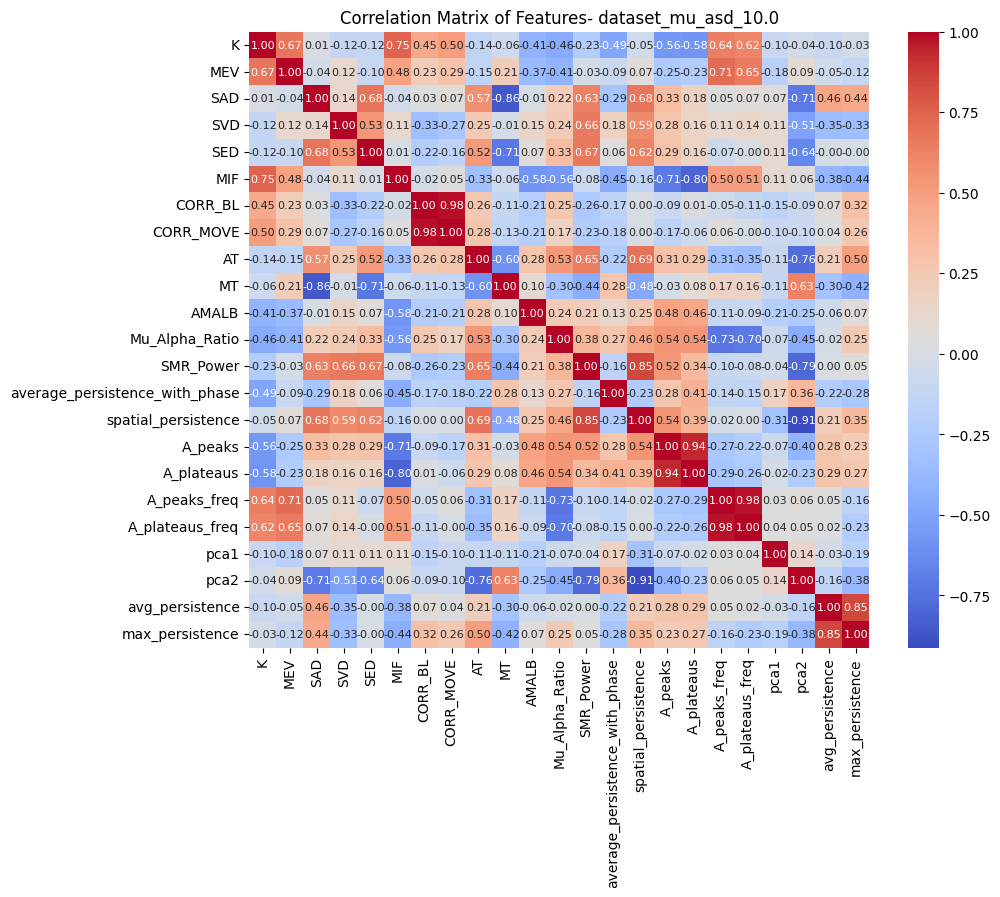

In [13]:
import seaborn as sns
import os
# Computing the correlation matrix
correlation_matrix = features.corr()
dataset_name = os.path.basename(path)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title(f'Correlation Matrix of Features- {dataset_name}')
plt.show()



Targets are calculated as the average of the answers of multiple experts for each ic.

In [14]:
def get_target_distribution(annotations):
    # Exclude non-numeric columns like 'user_hash' and other potential object-type columns
    flag_columns = annotations.select_dtypes(include=[bool, int, float]).columns
    # Perform groupby on 'ic_id' and calculate the mean for the flag columns
    return annotations.groupby('ic_id')[flag_columns].mean().apply(lambda x: x.value_counts())
get_target_distribution(raw_annotations)

,comment,flag_brain,flag_alpha,flag_mu,flag_eyes,flag_eyes_h,flag_eyes_v,flag_eyes_blinks,flag_muscles_and_movement,flag_muscles,flag_movement,flag_heart,flag_noise,flag_line_noise,flag_ch_noise,flag_uncertain,flag_other
0.0,NaN,NaN,11,11,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
1.0,NaN,22.0,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For now we do not want to distinguish between eye movement types, so we unite them under `'flag_eyes'`. We also presume the positive label for `'flag_alpha'` or `'flag_mu'` implies the positive label for `'flag_brain'`. Finally, since we do not have sufficient data for distinguishing line noise, we will not consider this flag.

In [15]:
def propogate_labels(annotations):
    #return annotations.assign(flag_brain=annotations[['flag_brain', 'flag_alpha', 'flag_mu']].any(axis=1)) \
                      #.drop(columns=['flag_line_noise', 'comment', 'flag_eyes',	'flag_eyes_h','flag_eyes_v', 'flag_eyes_blinks', 'flag_muscles_and_movement',	'flag_muscles',	'flag_movement',  'flag_noise','flag_ch_noise', 'flag_uncertain',	'flag_other' ])
    return annotations.assign(flag_brain=annotations[['flag_brain', 'flag_alpha', 'flag_mu']].any(axis=1)) \
                      .drop(columns=['flag_line_noise'])

annotations = propogate_labels(raw_annotations)
get_target_distribution(annotations)

,comment,flag_brain,flag_alpha,flag_mu,flag_eyes,flag_eyes_h,flag_eyes_v,flag_eyes_blinks,flag_muscles_and_movement,flag_muscles,flag_movement,flag_heart,flag_noise,flag_ch_noise,flag_uncertain,flag_other
0.0,NaN,NaN,11,11,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
1.0,NaN,22.0,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#'flag_eyes_blinks', 'flag_muscles_and_movement', 'flag_movement','flag_noise','flag_uncertain', 'flag_other'

In order to get binary labels we apply threshold to these averages. By default, the each label has weight $\frac{1}{n}$, where $n$ is the number of labels given to the ic by this expert. We set the threshold to $0.33$ For flags `alpha` and `mu` we choose a simpler approach: each label has weight $1$. The threshold in this case is equal to $0.5$.

In [17]:
from alice_ml.preprocessing import build_target_df
targets = build_target_df(annotations, weights='uniform', strategy='mean', threshold=0.33)

targets[['flag_alpha', 'flag_mu', 'flag_heart']] = build_target_df(annotations, ['flag_alpha', 'flag_mu', 'flag_heart'], strategy='majority')

print(targets.sum())
targets = targets.loc[:, (targets.mean(axis=0) > 0.05) & (targets.all(axis=0) < 0.95)]
targets.head()

flag_brain                   22
flag_alpha                   11
flag_mu                      11
flag_eyes                     0
flag_eyes_h                   0
flag_eyes_v                   0
flag_eyes_blinks              0
flag_muscles_and_movement     0
flag_muscles                  0
flag_movement                 0
flag_heart                    0
flag_noise                    0
flag_ch_noise                 0
flag_uncertain                0
flag_other                    0
dtype: int64


,flag_alpha,flag_mu
ic_id,,
IC002491,True,False
IC002513,False,True
IC002515,False,True
IC002522,True,False
IC002532,True,False


In [18]:
targets

,flag_alpha,flag_mu
ic_id,,
IC002491,True,False
IC002513,False,True
IC002515,False,True
IC002522,True,False
IC002532,True,False
IC002533,False,True
IC002537,False,True
IC002561,False,True
IC002588,True,False


In [19]:
features

,K,MEV,SAD,SVD,SED,MIF,CORR_BL,CORR_MOVE,AT,MT,...,average_persistence_with_phase,spatial_persistence,A_peaks,A_plateaus,A_peaks_freq,A_plateaus_freq,pca1,pca2,avg_persistence,max_persistence
IC002694,0.257372,32.436346,-0.048150,-0.064294,0.018228,0.135351,0.008420,0.010754,-0.009169,0.073744,...,0.638353,0.087481,0.431937,0.623037,9.168491,9.046090,0.014609,0.271185,0.047721,0.501112
IC002491,0.047633,144.903796,-0.106425,-0.026207,0.064827,0.165797,0.007034,0.008347,0.033114,0.151433,...,1.013842,0.149520,0.605664,0.775599,8.920110,8.850547,-0.026684,0.157589,0.028558,0.160894
IC002533,-0.256521,3.253832,-0.066450,-0.008905,0.146514,0.050304,0.003482,0.005025,0.076768,0.091645,...,1.022752,0.192914,0.688705,0.876033,9.401435,9.101277,0.509443,-0.292102,0.042710,0.509379
IC002561,0.658043,95.137074,-0.060966,-0.027087,0.023889,0.147233,0.015362,0.017387,0.055397,0.094813,...,0.741548,0.264641,0.580328,0.662295,9.106268,8.867847,-0.456185,-0.448217,0.041753,0.580042
IC002599,-0.305818,5.755902,-0.134419,-0.051479,0.040413,0.130575,0.001931,0.002232,-0.023055,0.096387,...,1.075822,0.030981,0.279749,0.356994,8.599659,8.324018,-0.105512,0.423922,0.045979,0.427039
IC002623,-0.293511,4.317078,-0.038938,-0.000204,0.182107,0.132900,0.003490,0.004287,0.006248,0.050173,...,1.097094,0.238072,0.711165,0.859223,8.750923,8.805466,0.397291,-0.253462,0.034988,0.282468
IC002515,-0.041907,5.678806,-0.155282,-0.019575,0.051769,0.295296,0.003826,0.005325,-0.013641,0.130177,...,0.726185,0.121404,0.213508,0.291939,8.977009,8.755083,-0.305704,-0.032109,0.023648,0.093007
IC002651,0.681738,95.981862,0.029930,-0.015203,0.229844,0.318649,0.005895,0.009435,0.014759,0.011908,...,0.967339,0.140538,0.249322,0.295393,11.255654,11.178388,0.573682,-0.181666,0.033211,0.124259
IC002589,-0.329044,4.107926,-0.059627,-0.032159,0.076678,0.082703,0.001313,0.001312,-0.056356,0.134715,...,1.003756,0.175200,0.883090,0.924843,9.798763,9.764107,-0.397932,-0.016941,0.035317,0.228181
IC002513,0.790829,6.152846,-0.174016,-0.018633,0.049056,0.366982,0.004826,0.005719,-0.056237,0.126065,...,0.714180,0.076229,0.305011,0.331155,9.438152,9.355552,0.329988,0.043241,0.025301,0.104585


/var/folders/1v/lp_rmhsx2x5cj9kbz4wt35d00000gn/T/ipykernel_24649/2285691928.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Label', y='avg_persistence', palette=palette)


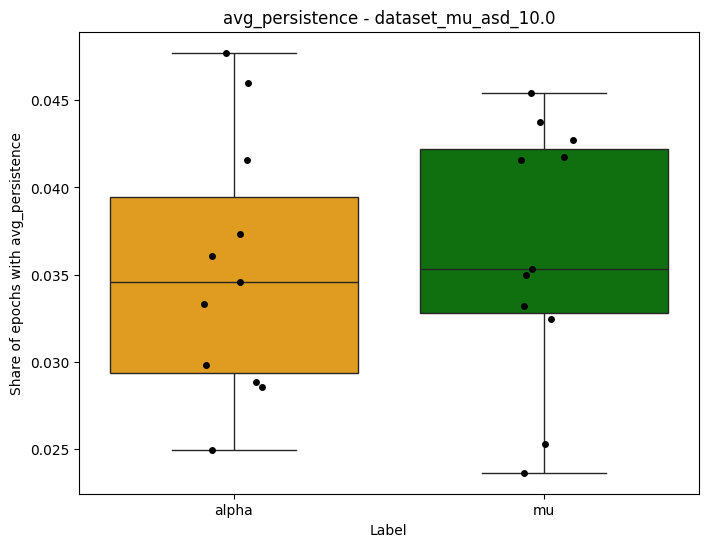

In [20]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import os

# Установим фиксированный seed для случайных чисел
np.random.seed(42)

# Загрузим данные (замени путь на свой)
# features = pd.read_csv('path_to_features.csv', index_col=0)
# targets = pd.read_csv('path_to_targets.csv', index_col=0)

dataset_name = os.path.basename(path)

# Соединим датафреймы по индексу
merged_df = features.join(targets, how='inner')

# Создадим новый столбец 'Label' для отображения категорий
merged_df['Label'] = 'None'
merged_df.loc[merged_df['flag_alpha'] == True, 'Label'] = 'alpha'
merged_df.loc[merged_df['flag_mu'] == True, 'Label'] = 'mu'

# Определим палитру цветов для каждого боксплота
palette = {"None": "skyblue", "alpha": "orange", "mu": "green"}

# Построим боксплот с разными цветами для каждой категории
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='Label', y='avg_persistence', palette=palette)
sns.stripplot(data=merged_df, x='Label', y='avg_persistence', color='black', jitter=True, dodge=True)
plt.title(f'avg_persistence - {dataset_name}')
plt.xlabel('Label')
plt.ylabel('Share of epochs with avg_persistence')
plt.show()


/var/folders/1v/lp_rmhsx2x5cj9kbz4wt35d00000gn/T/ipykernel_24649/267424948.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Label', y='max_persistence', palette=palette)


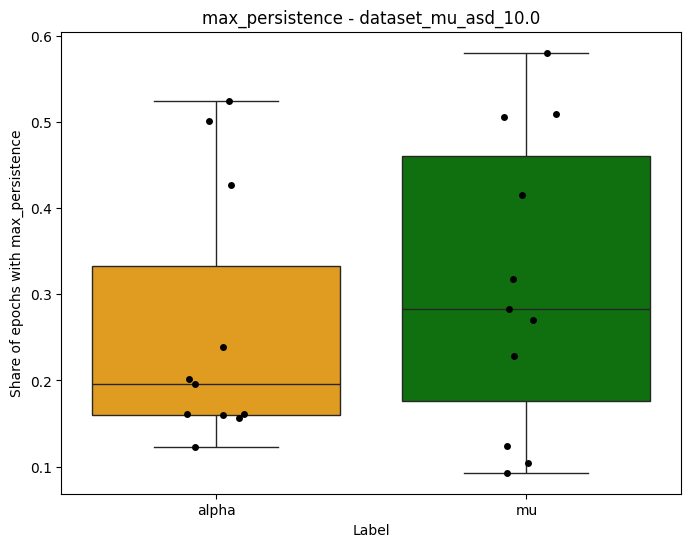

In [21]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import os

# Установим фиксированный seed для случайных чисел
np.random.seed(42)

# Загрузим данные (замени путь на свой)
# features = pd.read_csv('path_to_features.csv', index_col=0)
# targets = pd.read_csv('path_to_targets.csv', index_col=0)

dataset_name = os.path.basename(path)

# Соединим датафреймы по индексу
merged_df = features.join(targets, how='inner')

# Создадим новый столбец 'Label' для отображения категорий
merged_df['Label'] = 'None'
merged_df.loc[merged_df['flag_alpha'] == True, 'Label'] = 'alpha'
merged_df.loc[merged_df['flag_mu'] == True, 'Label'] = 'mu'

# Определим палитру цветов для каждого боксплота
palette = {"None": "skyblue", "alpha": "orange", "mu": "green"}

# Построим боксплот с разными цветами для каждой категории
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='Label', y='max_persistence', palette=palette)
sns.stripplot(data=merged_df, x='Label', y='max_persistence', color='black', jitter=True, dodge=True)
plt.title(f'max_persistence - {dataset_name}')
plt.xlabel('Label')
plt.ylabel('Share of epochs with max_persistence')
plt.show()


/var/folders/1v/lp_rmhsx2x5cj9kbz4wt35d00000gn/T/ipykernel_24649/2815169557.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Label', y='spatial_persistence', palette=palette)


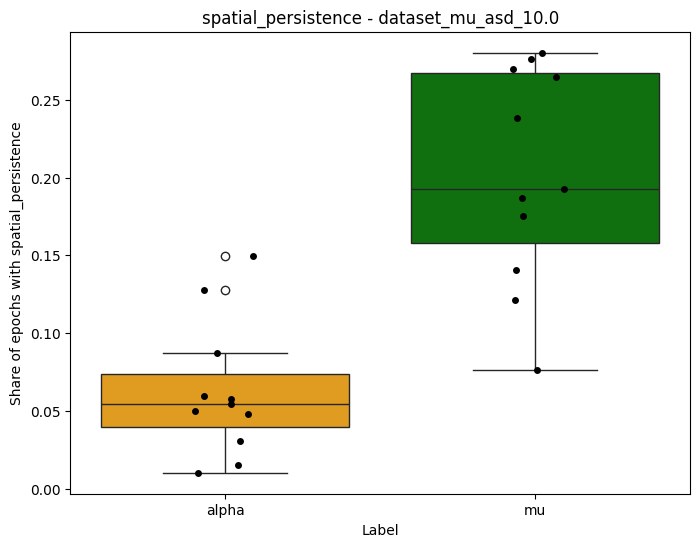

In [22]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import os

# Установим фиксированный seed для случайных чисел
np.random.seed(42)

# Загрузим данные (замени путь на свой)
# features = pd.read_csv('path_to_features.csv', index_col=0)
# targets = pd.read_csv('path_to_targets.csv', index_col=0)

dataset_name = os.path.basename(path)

# Соединим датафреймы по индексу
merged_df = features.join(targets, how='inner')

# Создадим новый столбец 'Label' для отображения категорий
merged_df['Label'] = 'None'
merged_df.loc[merged_df['flag_alpha'] == True, 'Label'] = 'alpha'
merged_df.loc[merged_df['flag_mu'] == True, 'Label'] = 'mu'

# Определим палитру цветов для каждого боксплота
palette = {"None": "skyblue", "alpha": "orange", "mu": "green"}

# Построим боксплот с разными цветами для каждой категории
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='Label', y='spatial_persistence', palette=palette)
sns.stripplot(data=merged_df, x='Label', y='spatial_persistence', color='black', jitter=True, dodge=True)
plt.title(f'spatial_persistence - {dataset_name}')
plt.xlabel('Label')
plt.ylabel('Share of epochs with spatial_persistence')
plt.show()


/var/folders/1v/lp_rmhsx2x5cj9kbz4wt35d00000gn/T/ipykernel_24649/770954901.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Label', y='SMR_Power', palette=palette)


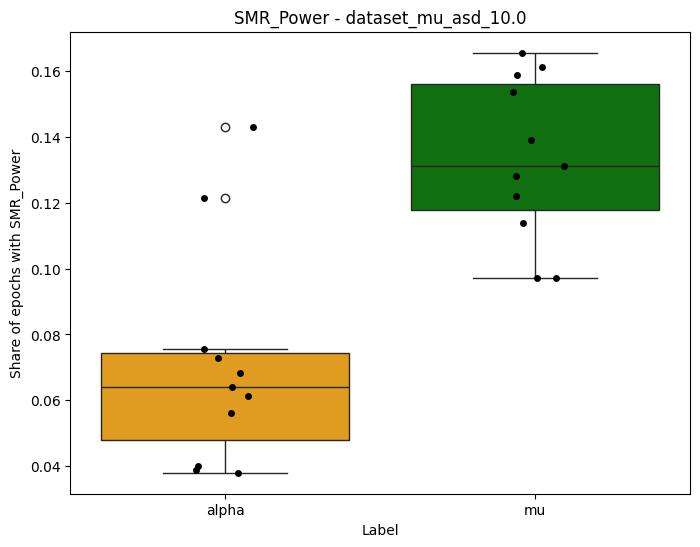

In [23]:
import seaborn as sns
import pandas as pd
import seaborn as sns

# Установим фиксированный seed для случайных чисел
np.random.seed(42)

# Загрузим данные (замени путь на свой)
# features = pd.read_csv('path_to_features.csv', index_col=0)
# targets = pd.read_csv('path_to_targets.csv', index_col=0)

# Соединим датафреймы по индексу
merged_df = features.join(targets, how='inner')

# Создадим новый столбец 'Label' для отображения категорий
merged_df['Label'] = 'None'
merged_df.loc[merged_df['flag_alpha'] == True, 'Label'] = 'alpha'
merged_df.loc[merged_df['flag_mu'] == True, 'Label'] = 'mu'

# Определим палитру цветов для каждого боксплота
palette = {"None": "skyblue", "alpha": "orange", "mu": "green"}

# Построим боксплот с разными цветами для каждой категории
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='Label', y='SMR_Power', palette=palette)
sns.stripplot(data=merged_df, x='Label', y='SMR_Power', color='black', jitter=True, dodge=True)
plt.title(f'SMR_Power - {dataset_name}')
plt.xlabel('Label')
plt.ylabel('Share of epochs with SMR_Power')
plt.show()

/var/folders/1v/lp_rmhsx2x5cj9kbz4wt35d00000gn/T/ipykernel_24649/335766464.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Label', y='Mu_Alpha_Ratio', palette=palette)


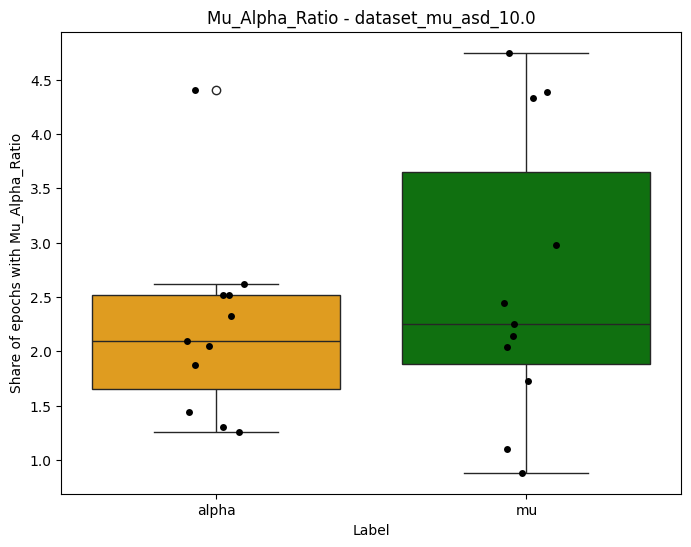

In [24]:
import seaborn as sns
import pandas as pd
import seaborn as sns

# Установим фиксированный seed для случайных чисел
np.random.seed(42)

# Загрузим данные (замени путь на свой)
# features = pd.read_csv('path_to_features.csv', index_col=0)
# targets = pd.read_csv('path_to_targets.csv', index_col=0)

# Соединим датафреймы по индексу
merged_df = features.join(targets, how='inner')

# Создадим новый столбец 'Label' для отображения категорий
merged_df['Label'] = 'None'
merged_df.loc[merged_df['flag_alpha'] == True, 'Label'] = 'alpha'
merged_df.loc[merged_df['flag_mu'] == True, 'Label'] = 'mu'

# Определим палитру цветов для каждого боксплота
palette = {"None": "skyblue", "alpha": "orange", "mu": "green"}

# Построим боксплот с разными цветами для каждой категории
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='Label', y='Mu_Alpha_Ratio', palette=palette)
sns.stripplot(data=merged_df, x='Label', y='Mu_Alpha_Ratio', color='black', jitter=True, dodge=True)
plt.title(f'Mu_Alpha_Ratio - {dataset_name}')
plt.xlabel('Label')
plt.ylabel('Share of epochs with Mu_Alpha_Ratio')
plt.show()

/var/folders/1v/lp_rmhsx2x5cj9kbz4wt35d00000gn/T/ipykernel_24649/3723618496.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Label', y='average_persistence_with_phase', palette=palette)


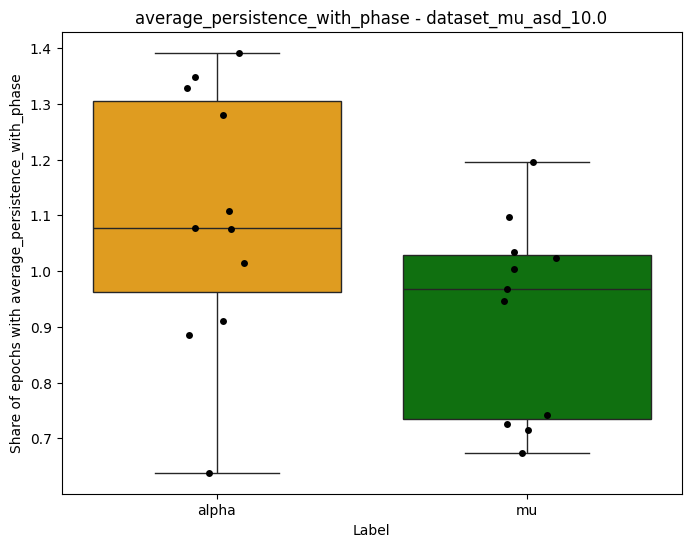

In [25]:
import seaborn as sns
import pandas as pd
import seaborn as sns

# Установим фиксированный seed для случайных чисел
np.random.seed(42)

# Загрузим данные (замени путь на свой)
# features = pd.read_csv('path_to_features.csv', index_col=0)
# targets = pd.read_csv('path_to_targets.csv', index_col=0)

# Соединим датафреймы по индексу
merged_df = features.join(targets, how='inner')

# Создадим новый столбец 'Label' для отображения категорий
merged_df['Label'] = 'None'
merged_df.loc[merged_df['flag_alpha'] == True, 'Label'] = 'alpha'
merged_df.loc[merged_df['flag_mu'] == True, 'Label'] = 'mu'

# Определим палитру цветов для каждого боксплота
palette = {"None": "skyblue", "alpha": "orange", "mu": "green"}

# Построим боксплот с разными цветами для каждой категории
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='Label', y='average_persistence_with_phase', palette=palette)
sns.stripplot(data=merged_df, x='Label', y='average_persistence_with_phase', color='black', jitter=True, dodge=True)
plt.title(f'average_persistence_with_phase - {dataset_name}')
plt.xlabel('Label')
plt.ylabel('Share of epochs with average_persistence_with_phase')
plt.show()

In [26]:
annotations.shape, targets.shape

((22, 18), (22, 2))

In [27]:
features.to_csv('featrues_Kids_0.2.csv')

In [28]:
targets.to_csv('target_Kids_0.2.csv')

For training we use XGboost, LinearSVM, and Logistic Regression with default parameters. We do a stratified train-test split with test size = 0.3.

In [29]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

models = {'LR': LogisticRegression(solver='liblinear', penalty='l2', C=1.0),
        'XGB': XGBClassifier(learning_rate=0.3, max_depth=4, n_estimators=30, eval_metric='logloss', use_label_encoder=False),
        'SVM': SVC(kernel='linear', probability=True),
        'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0),  # Adding CatBoostClassifier
        'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0)  # Adding AdaBoostClassifier
}
n_repeats = 50

In [30]:
from sklearn.model_selection import train_test_split

def repeated_train_test(features, target, model, n_repeats, test_size=0.3, axes=None, random_state=57):
    y_true = []
    y_pred = []
    y_proba = []
    np.random.seed(random_state)

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, stratify=target)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        model.fit(X_train, y_train)
        y_true.append(y_test)
        y_pred.append(model.predict(X_test))
        y_proba.append(model.predict_proba(X_test)[:, 1])

    return np.array(y_true), np.array(y_pred), np.array(y_proba)


In [31]:
from alice_ml.vis import plot_aggregated_pr_curve, plot_aggregated_roc_curve

def plot_curves_grid(features, targets, models):

    fig_roc, axes_roc = plt.subplots(len(models), len(targets.columns), figsize=(4 * len(targets.columns), 3 * len(models)))
    fig_pr, axes_pr = plt.subplots(len(models), len(targets.columns), figsize=(4 * len(targets.columns), 3 * len(models)))

    for (model_name, model), row_roc, row_pr in zip(models.items(), axes_roc, axes_pr):
        for flag, ax_roc, ax_pr in zip(targets, row_roc, row_pr):
            y_true, _, y_proba = repeated_train_test(features, targets[flag], model, n_repeats)
            plot_aggregated_roc_curve(y_true, y_proba, ax_roc)
            plot_aggregated_pr_curve(y_true, y_proba, ax_pr)

        row_roc[0].set_ylabel(model_name, fontsize=28, labelpad=16)
        row_pr[0].set_ylabel(model_name, fontsize=28, labelpad=16)

        row_roc[-1].set_ylabel('True positive rate', fontsize=18)
        row_pr[-1].set_ylabel('Precision', fontsize=18)
        row_roc[-1].yaxis.set_label_position('right')
        row_pr[-1].yaxis.set_label_position('right')

    for target_name, ax_roc, ax_pr in zip(targets, axes_roc[0], axes_pr[0]):
        ax_roc.set_title(target_name[5:].capitalize(), fontsize=28, pad=16)
        ax_pr.set_title(target_name[5:].capitalize(), fontsize=28, pad=16)

    for ax_roc, ax_pr in zip(axes_roc[-1], axes_pr[-1]):
        ax_roc.set_xlabel('False positive rate', fontsize=18)
        ax_pr.set_xlabel('Recall', fontsize=18)

    fig_roc.subplots_adjust(wspace=0.1, hspace=0.1)
    fig_pr.subplots_adjust(wspace=0.1, hspace=0.1)

    for row_roc, row_pr in zip(axes_roc[:-1], axes_pr[:-1]):
        for ax_roc, ax_pr in zip(row_roc, row_pr):
            plt.setp(ax_roc.get_xticklabels(), visible=False)
            plt.setp(ax_pr.get_xticklabels(), visible=False)

    for row_roc, row_pr in zip(axes_roc, axes_pr):
        for ax_roc, ax_pr in zip(row_roc[:-1], row_pr[:-1]):
            plt.setp(ax_roc.get_yticklabels(), visible=False)
            plt.setp(ax_pr.get_yticklabels(), visible=False)

    return fig_roc, fig_pr

/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:24:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:24:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:24:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:24:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_lab

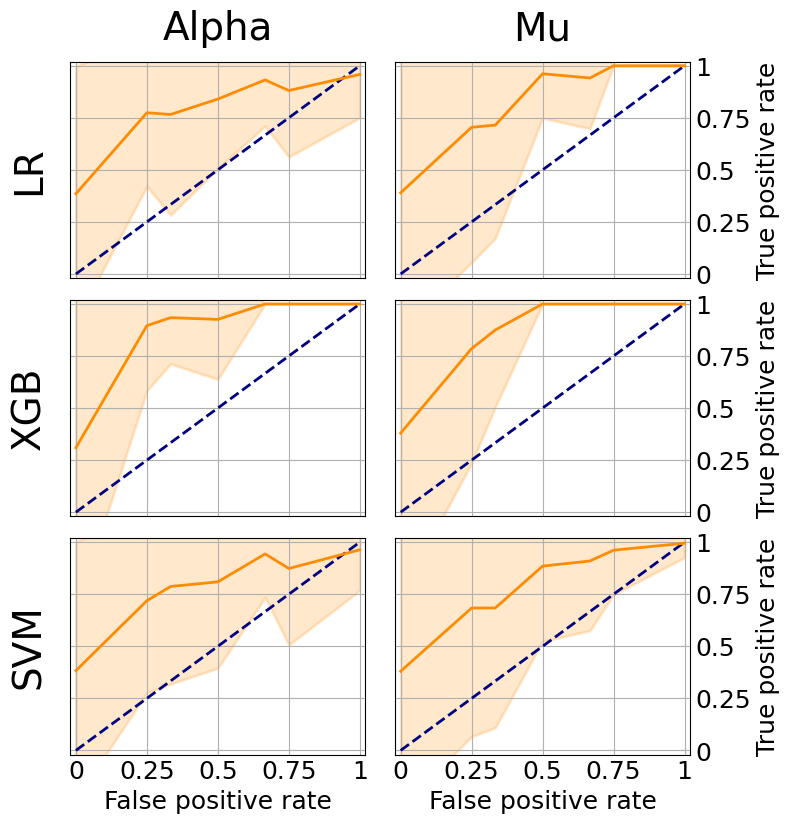

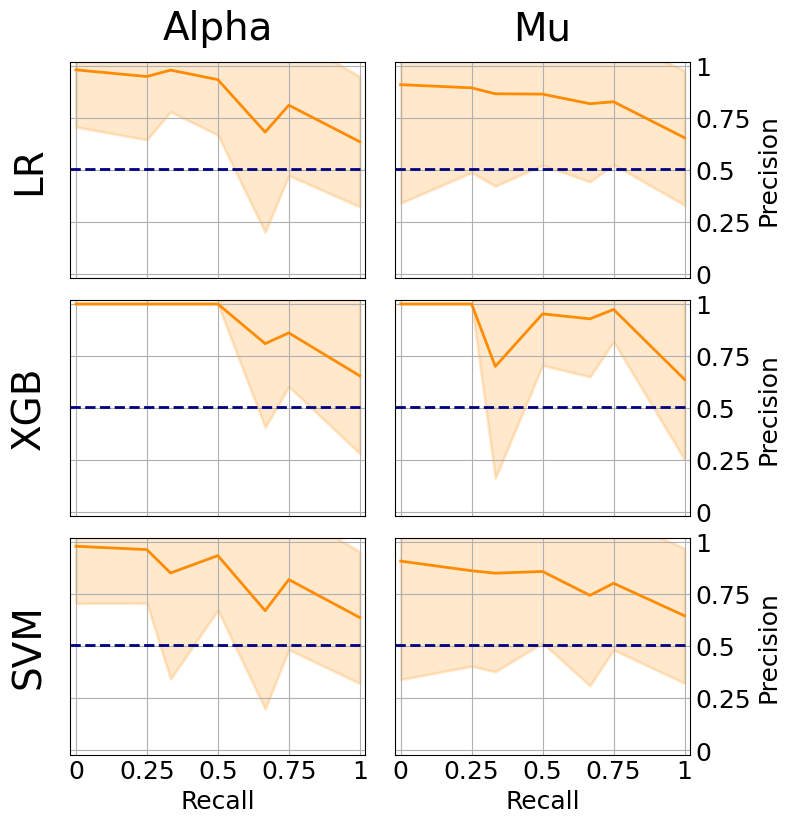

In [32]:
fig_roc, fig_pr = plot_curves_grid(features, targets, models)

In [33]:
features.shape, targets.shape

((22, 23), (22, 2))

In [34]:
features.index 

Index(['IC002694', 'IC002491', 'IC002533', 'IC002561', 'IC002599', 'IC002623',
       'IC002515', 'IC002651', 'IC002589', 'IC002513', 'IC002597', 'IC002664',
       'IC002532', 'IC002522', 'IC002679', 'IC002598', 'IC002648', 'IC002618',
       'IC002655', 'IC002537', 'IC002588', 'IC002620'],
      dtype='object')

In [35]:
annotations['ic_id']

0     IC002513
1     IC002561
2     IC002515
3     IC002655
4     IC002532
5     IC002533
6     IC002597
7     IC002598
8     IC002599
9     IC002537
10    IC002491
11    IC002522
12    IC002618
13    IC002694
14    IC002679
15    IC002588
16    IC002620
17    IC002648
18    IC002664
19    IC002589
20    IC002623
21    IC002651
Name: ic_id, dtype: object

In [36]:
features

,K,MEV,SAD,SVD,SED,MIF,CORR_BL,CORR_MOVE,AT,MT,...,average_persistence_with_phase,spatial_persistence,A_peaks,A_plateaus,A_peaks_freq,A_plateaus_freq,pca1,pca2,avg_persistence,max_persistence
IC002694,0.257372,32.436346,-0.048150,-0.064294,0.018228,0.135351,0.008420,0.010754,-0.009169,0.073744,...,0.638353,0.087481,0.431937,0.623037,9.168491,9.046090,0.014609,0.271185,0.047721,0.501112
IC002491,0.047633,144.903796,-0.106425,-0.026207,0.064827,0.165797,0.007034,0.008347,0.033114,0.151433,...,1.013842,0.149520,0.605664,0.775599,8.920110,8.850547,-0.026684,0.157589,0.028558,0.160894
IC002533,-0.256521,3.253832,-0.066450,-0.008905,0.146514,0.050304,0.003482,0.005025,0.076768,0.091645,...,1.022752,0.192914,0.688705,0.876033,9.401435,9.101277,0.509443,-0.292102,0.042710,0.509379
IC002561,0.658043,95.137074,-0.060966,-0.027087,0.023889,0.147233,0.015362,0.017387,0.055397,0.094813,...,0.741548,0.264641,0.580328,0.662295,9.106268,8.867847,-0.456185,-0.448217,0.041753,0.580042
IC002599,-0.305818,5.755902,-0.134419,-0.051479,0.040413,0.130575,0.001931,0.002232,-0.023055,0.096387,...,1.075822,0.030981,0.279749,0.356994,8.599659,8.324018,-0.105512,0.423922,0.045979,0.427039
IC002623,-0.293511,4.317078,-0.038938,-0.000204,0.182107,0.132900,0.003490,0.004287,0.006248,0.050173,...,1.097094,0.238072,0.711165,0.859223,8.750923,8.805466,0.397291,-0.253462,0.034988,0.282468
IC002515,-0.041907,5.678806,-0.155282,-0.019575,0.051769,0.295296,0.003826,0.005325,-0.013641,0.130177,...,0.726185,0.121404,0.213508,0.291939,8.977009,8.755083,-0.305704,-0.032109,0.023648,0.093007
IC002651,0.681738,95.981862,0.029930,-0.015203,0.229844,0.318649,0.005895,0.009435,0.014759,0.011908,...,0.967339,0.140538,0.249322,0.295393,11.255654,11.178388,0.573682,-0.181666,0.033211,0.124259
IC002589,-0.329044,4.107926,-0.059627,-0.032159,0.076678,0.082703,0.001313,0.001312,-0.056356,0.134715,...,1.003756,0.175200,0.883090,0.924843,9.798763,9.764107,-0.397932,-0.016941,0.035317,0.228181
IC002513,0.790829,6.152846,-0.174016,-0.018633,0.049056,0.366982,0.004826,0.005719,-0.056237,0.126065,...,0.714180,0.076229,0.305011,0.331155,9.438152,9.355552,0.329988,0.043241,0.025301,0.104585


In [37]:
targets

,flag_alpha,flag_mu
ic_id,,
IC002491,True,False
IC002513,False,True
IC002515,False,True
IC002522,True,False
IC002532,True,False
IC002533,False,True
IC002537,False,True
IC002561,False,True
IC002588,True,False


In [38]:
raw_annotations

,ic_id,user_hash,comment,flag_brain,flag_alpha,flag_mu,flag_eyes,flag_eyes_h,flag_eyes_v,flag_eyes_blinks,flag_muscles_and_movement,flag_muscles,flag_movement,flag_heart,flag_noise,flag_line_noise,flag_ch_noise,flag_uncertain,flag_other
0,IC002513,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,IC002561,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,IC002515,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,IC002655,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,IC002532,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,IC002533,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6,IC002597,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,IC002598,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,IC002599,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,IC002537,33326b51632c520162e38b3e2836402ba097aa1249edf2...,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
from sklearn.metrics import auc, roc_curve, precision_recall_curve

def get_aucs(true, proba):
    roc_aucs, pr_aucs = [], []
    for true, proba in zip(y_true, y_proba):
        fpr, tpr, _ = roc_curve(true, proba, drop_intermediate=False)
        prec, rec, _ = precision_recall_curve(true, proba)
        roc_aucs.append(auc(fpr, tpr))
        pr_aucs.append(auc(rec, prec))
    return roc_aucs, pr_aucs

In [40]:
from itertools import product
from sklearn.metrics import f1_score

roc_aucs = pd.DataFrame(index=models, columns=targets.columns, dtype=float)
pr_aucs = pd.DataFrame(index=models, columns=targets.columns, dtype=float)
f1_scores = pd.DataFrame(index=models, columns=targets.columns, dtype=float)

for (model_name, model), flag in product(models.items(), targets):
        y_true, y_pred, y_proba = repeated_train_test(features, targets[flag], model, n_repeats)
        roc_auc_values, pr_auc_values = get_aucs(y_true, y_proba)
        f1_score_values = [f1_score(true, pred) for true, pred in zip(y_true, y_pred)]
        roc_aucs.loc[model_name, flag] = np.mean(roc_auc_values)
        pr_aucs.loc[model_name, flag] = np.mean(pr_auc_values)
        f1_scores.loc[model_name, flag] = np.mean(f1_score_values)


/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:24:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:24:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:24:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/beliaevaaleksandra/homeworks/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:24:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_lab

In [41]:
roc_aucs

,flag_alpha,flag_mu
LR,0.853333,0.881667
XGB,0.844167,0.854167
SVM,0.850000,0.853333


In [42]:
pr_aucs

,flag_alpha,flag_mu
LR,0.890679,0.872111
XGB,0.894018,0.900310
SVM,0.881431,0.854804


In [43]:
pr_aucs

,flag_alpha,flag_mu
LR,0.890679,0.872111
XGB,0.894018,0.900310
SVM,0.881431,0.854804


In [44]:
f1_scores

,flag_alpha,flag_mu
LR,0.798095,0.791429
XGB,0.834313,0.809222
SVM,0.772968,0.752429


For each flag we choose the model based on ROC-AUC if the classes are balanced and on F1 scores otherwise.

Save pretrained models

In [45]:
import joblib

scaler = StandardScaler()
X_train = scaler.fit_transform(features)
joblib.dump(scaler, 'scaler.joblib')

for flag in targets.columns:
    model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
    model.fit(X_train, targets[flag])
    joblib.dump(model, 'lr_' + flag + '.joblib')    